# Requirements

Some of the scripts that execute inside this Notebook integrate functionality of application programable interfaces (API) from Twitter and Google. To utilize this API the user (You) will need to generate access tokens to interact with these APIs.

## What you need to know

- Having an email account (suggest using the institutional account for student and researchers).
- Some experience using Text Clients or CLI (Bash, PowerShell, ZSh, etc...)
- Following instructions and reading documentations

## Content 

- [Twitter Credentials](#Twitter-Credentials)
- [Google API Credentials](#Google-API-Credentials)


## **Twitter Credentials**

### **Developer Account Registration**

Some students may have already registered for a Twitter Developer account as part of their academic journey. If you haven'e follow the instructions bellow.

To use the twitter API a user most register for a developer account at [Twitter Developer Portal](https://developer.twitter.com/). Select Apply and follow the instructions. If the eamil is not registered for twitter, then register and the continue the developer application.

During the registration process twitter will ask basic usage information and the **intended use**. The intended use is clasiffeid in four different areas:
- Analyze Twitter Data
  - You can utilize the bellow description:
```
I hope to utilize the twitter API to learn about API, authentication and data analysis. I hope to transfor the data into different formats using libraries like python Pandas. In particular, I want to use the API as part of my academic curriculum to learn more about Restful APIs and coding.
```
- Use Tweet, Retweet, Like, Follow, or Direct Message 
  - Select `No`
- Display Tweets or aggregated data about Twitter content outside Twitter
  - Select `No`
- Make data available to a government Entity
  - Select `No`

After accepting the agreements the application will be ***under review***.

<p class="alert alert-info"><b>Note</b>: Applications are not approved inmediately. It may take a few days to be activated. A simple google search will give you this output.</p>
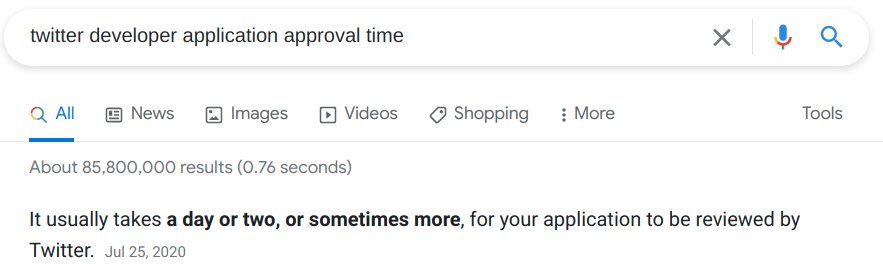

<p class="alert alert-warning"><b>Note</b>: Keep watch of the email account used for registration, as you may be contacted for more information before being approved.</p>
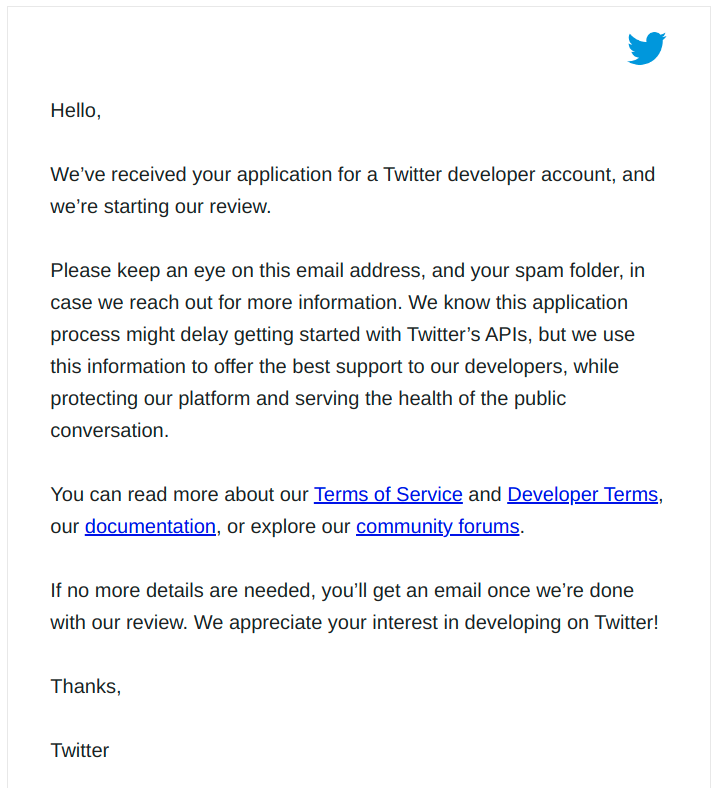

### **Twitter Credentials Generation**

<!-- 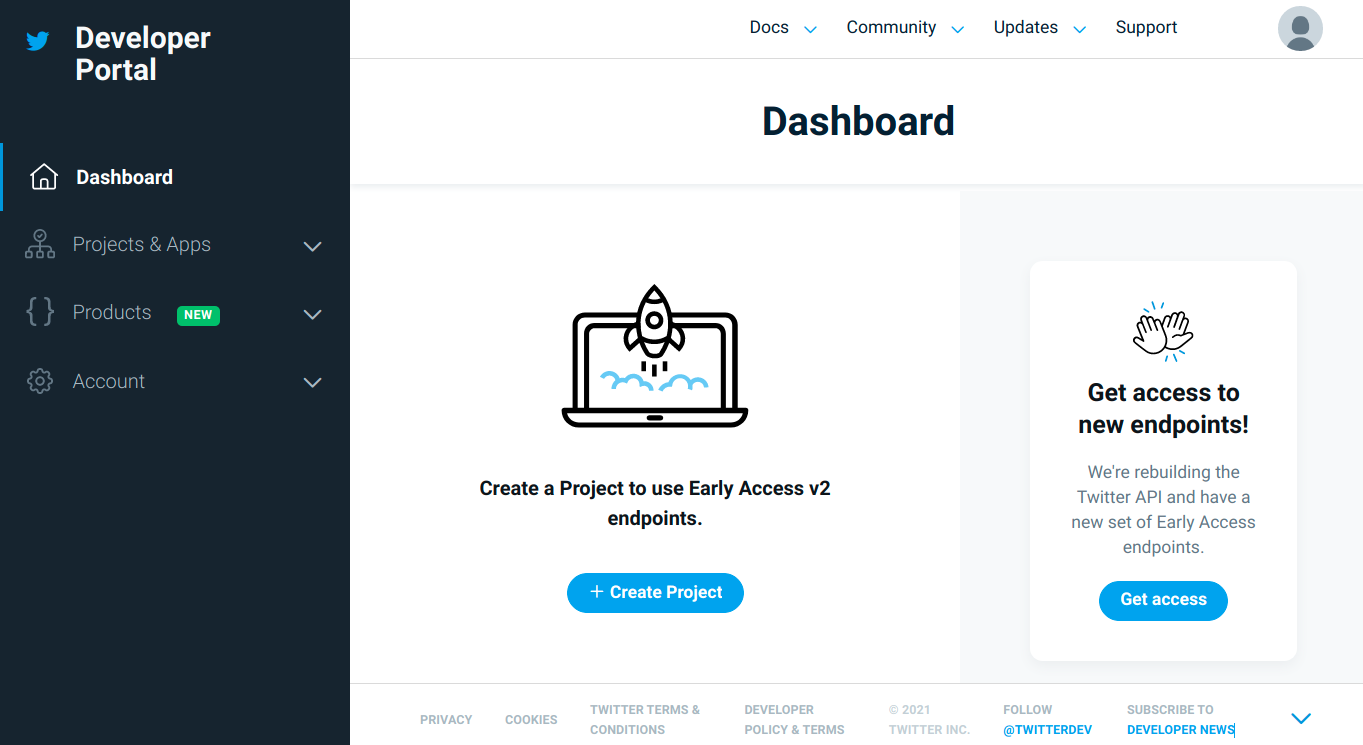 -->

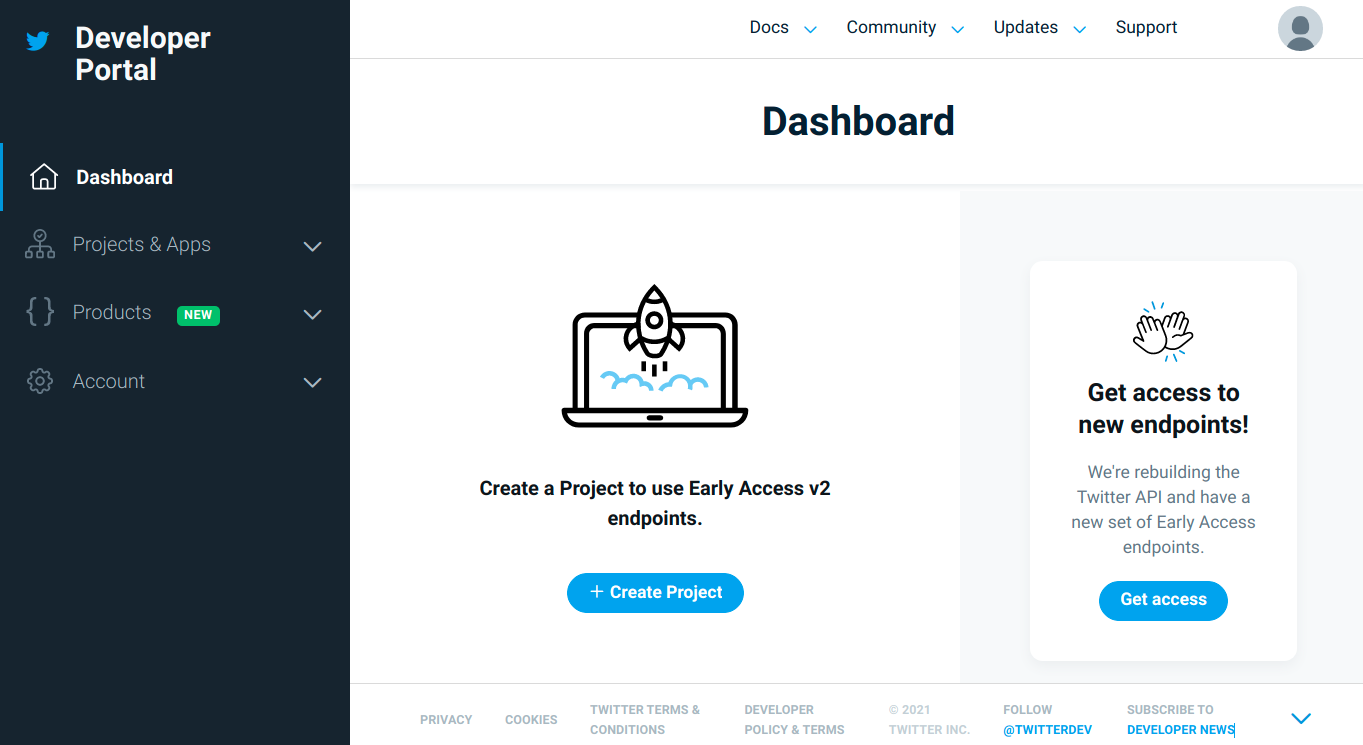

Once you have credentials you will be allowed access to the [developer portal](https://developer.twitter.com/en/portal/dashboard). We recommend creating a separate project and credentials for these notebooks. Once you have finished with the project you can just delete it and avoid other individuals using your credentials for inappropriate actions.

### Create Project

Go to 'Project & Apps - Overview' to create a new project. Projects have the benefit that they should offer access to both the API v1.1 and V2. However always consider that the API v2 was under development when this instructions were released.

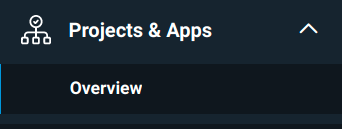

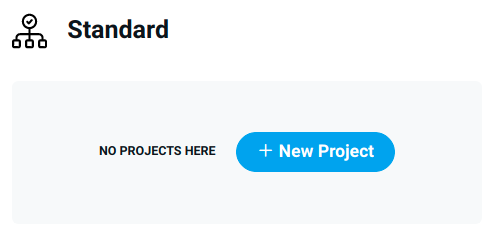

Name your project with a distinctive name.

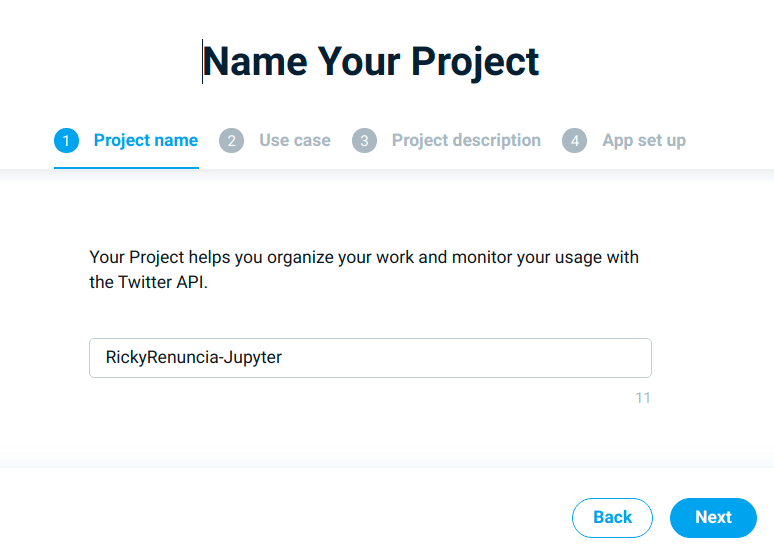

Set use case as `Student`.

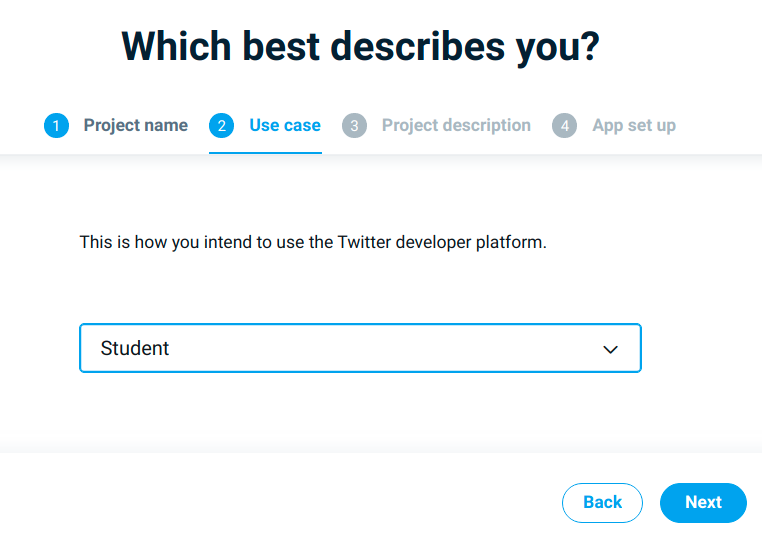

Describe your project. Example: "Practice Restful API interaction and interact with data from Twitter resources to describe social media."

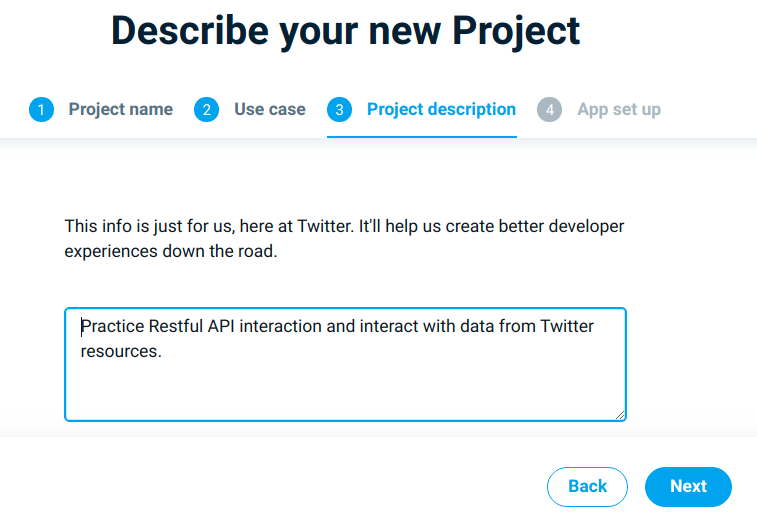

### Create First Project App

The interface should redirect you to creating the first app in the project.

Name it with an identifiable name such as `RickyRenuncia-App`.

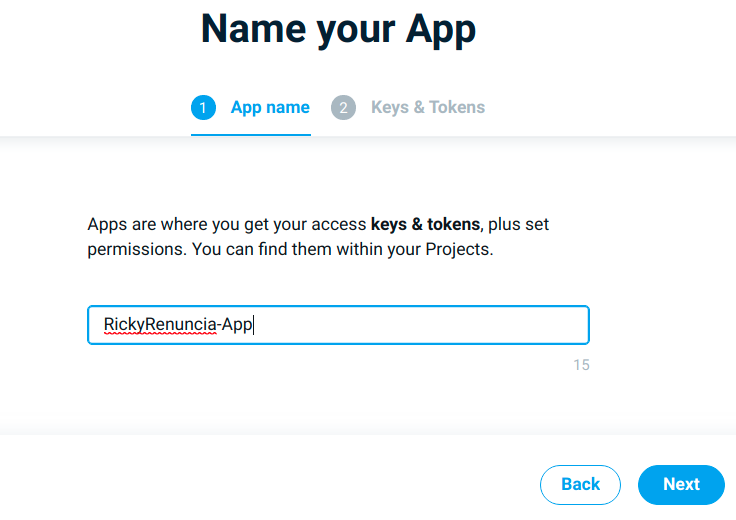


### **STORE CREDENTIALS**

The next window will show you three keys: `API Key`, `API Secret Key`, and `Bearer Token`. These should be stored inmediately in a save location. Ideally a text file in a user directory owned by you. 

<div class="alert alert-warning">Do not store this values directly in Jupyter, store them in your local computer for future use!</div>

### **Preparing Credentials for Notebooks**

The **API** and **API Secret** keys are used for API where the user is not only consuming data but also posting changes such as making posts, comments or updating the profile.

On the other hand, the **Bearer Token** is used for read-only actions. The `tweet-requester` library performs read-only actions and therefore only uses the **Bearer Token**.

Open the file `twitter_secrets.py`. Paste your Bearer Token into the string and safe the file.

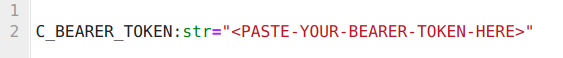


# **Google API Credentials**

\[**Optional** -> Missing GC credentials disables automatic translations of text.\]

The libraries available inside this notebook utilize the Google Translate API to automatically display tweet text in a selected language ("en" = English by default). 

This API can automatically detect the original language and offer a translation to a specified language. But requires a registered developer account and **enabling billing** to use even the free tier that offers **free translation for the first 500,000 characters every month**.

This tutorial ["Using the Translation API with Python"](https://codelabs.developers.google.com/codelabs/cloud-translation-python3#0) includes very detail instructions on how to utilize the Google "Cloud Shell" to generate a credentials JSON file. The instructions here follow the first 4 steps from the tutorial and then grab the credentials file to utilize with thie notebook.

### Step 1: Open Google Console

Visit [Google Cloud Console](https://console.cloud.google.com/). Activate your account to use the cloud console.

### Step 2: Create Project

APIs are used by users under different project names to organize resources and charge usage. Creating a project for this notebook is recommended as it will make it easier to disable the APIs and avoid charges later on. It is also required to utilize the Translation API.

Search for **"Create a Project"** in the search bar:

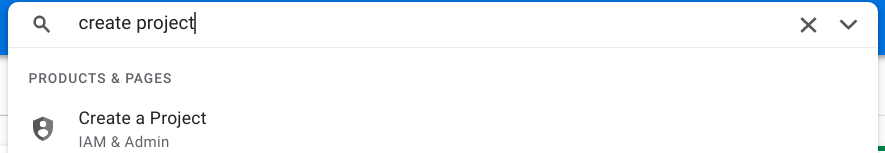

Once in, give the project a unique name like **ricky-renuncia-api** and press **Create**.

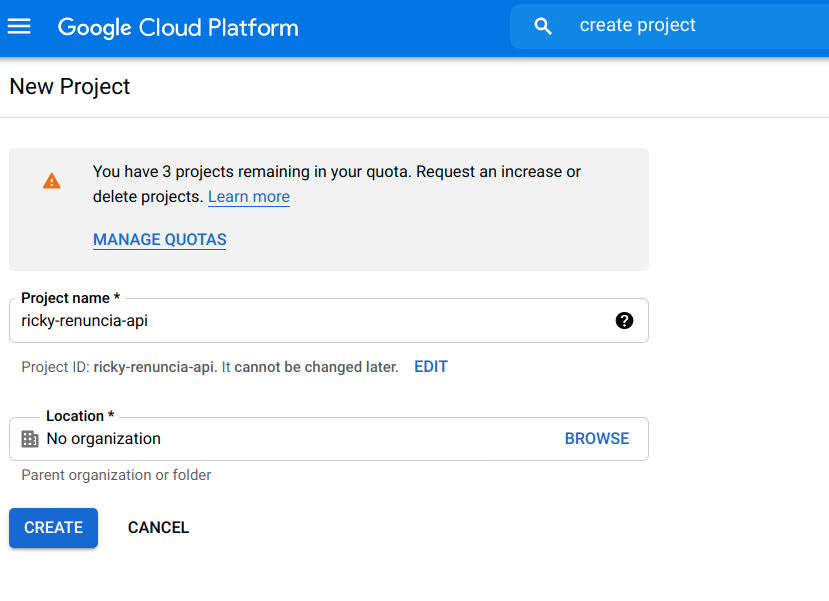

### Step 3: Enable Billing

Some Google APIs require billing to be used. Google Translate API is one of these APIs, visit [Enable Billing](https://console.cloud.google.com/billing) to enter a payment method.

**Most users will not pay anything for their usage**, as Google Translate offers a **free teir of 500,000 characters** each month. 

**Disable Google Cloud Service Account** optional step details how to disable/remove the service account to avoid charges after finishing testing this notebook.

### Step 4: Open the Cloud Shell & Enalbe Traslate API

Press ![image.png](attachment:3e9fe4c9-ed75-4a95-8233-9d358868214b.png "terminal icon") on the top right of the cloud console. The Cloud Shell should open at the bottom of the window.

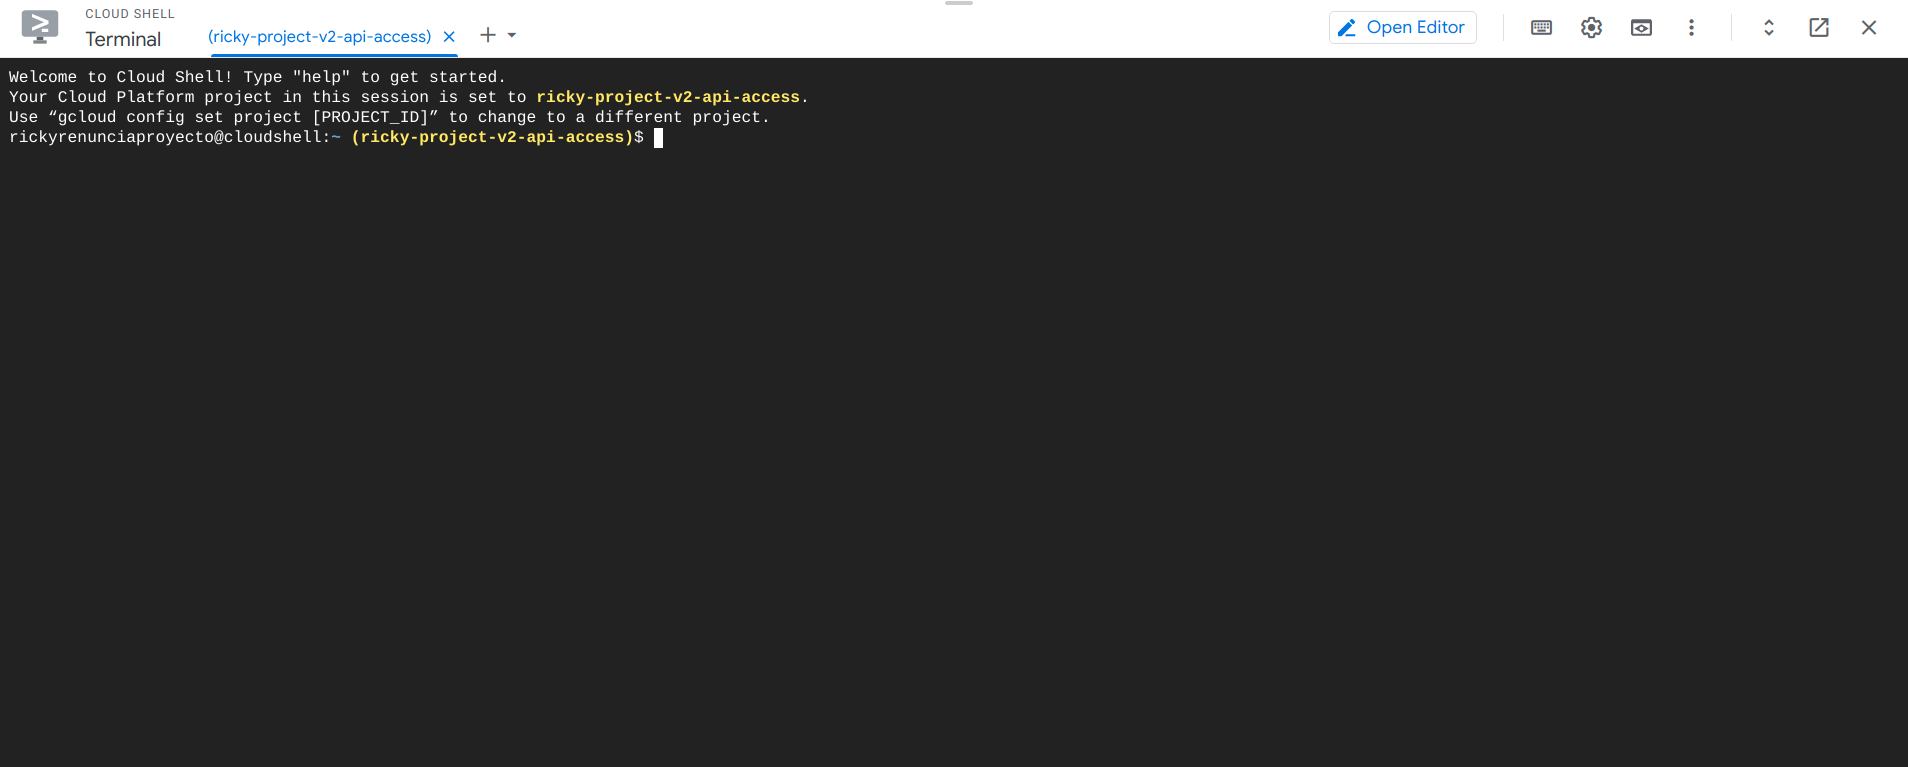
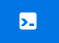

### Step 5: Enable Traslate API

Enabling the API for the current project is as simple as pasting the following code in the Cloud Shell

```
gcloud services enable translate.googleapis.com
```

I may require you to grant permission to the current shell, grant those permissions to continue.

### Step 6: Authenticate API requests

**Note: Mostly based from https://codelabs.developers.google.com/codelabs/cloud-translation-python3#3**

With the Translate API active now we can create a service account to use this API.

1. Update the PROJECT_ID environment variables: `export PROJECT_ID=$(gcloud config get-value core/project)`

2. Verify PROJECT_ID variable running `echo $PROJECT_ID`. You should see an output like `ricky-renuncia-api` or the name you used for the project.

3. Create Service Account
    ```
    gcloud iam service-accounts create ricky-renuncia-api-sa \
      --display-name "my translation service account"
    ```
4. Grante permisions to the service account
    ```
    gcloud projects add-iam-policy-binding ${PROJECT_ID} \
      --member serviceAccount:ricky-renuncia-api-sa@${PROJECT_ID}.iam.gserviceaccount.com \
      --role roles/cloudtranslate.user
    ```
5. Generate JSON file:
    ```
    gcloud iam service-accounts keys create ~/key.json \
      --iam-account my-translation-sa@${PROJECT_ID}.iam.gserviceaccount.com
    ```
6. Display JSON file:
    ```
    cat ~/key.json
    ```
7. In Jupyter open `google_translate_keys.json` and replace the content of the file with the output seen on the terminal.

## Disable/Remove Google Cloud Service Account

<div class="alert alert-warning" style="font-size:1.2em;">It is important to disable these permissions to avoid charges to your Google Developer Account.</div>

To completely disable the usage of your API there are three different alternatives available:
1. Remove the project
2. Remove the Role (remove permissions)
3. Remove the Service Account

### Remove service account
Search for IAM (Identity & Accesss Management) and enter:

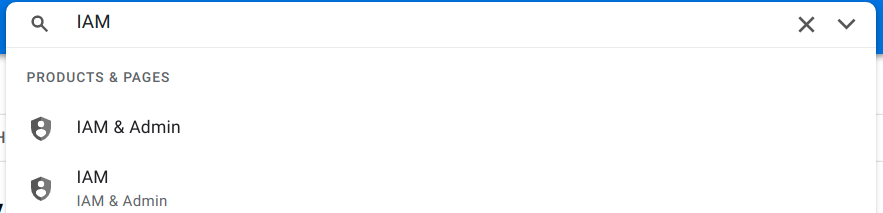

### **Remove Account**

Find the service account previously created `ricky-renuncia-api@<project-name>` for example. Select the account with a checkmark  and remove it 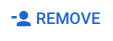

### **Remove Role** (Permissions)

Find the service account previously created `ricky-renuncia-api@<project-name>` for example and edit 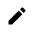 the member:

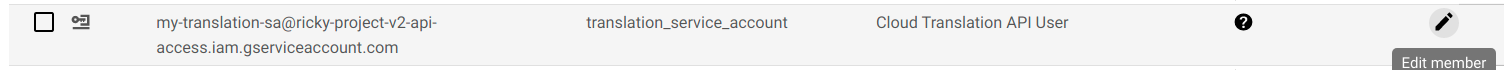

You should see a menu titled "Edit permissions" where you can delete 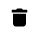 the Cloud Translation API User role and press "SAVE" 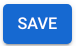:

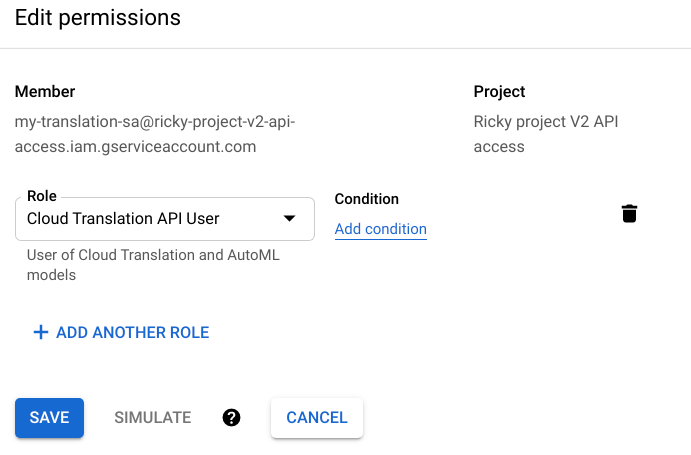


### Remove Project

Search for **Manage Resources** in the top bar searchbox.

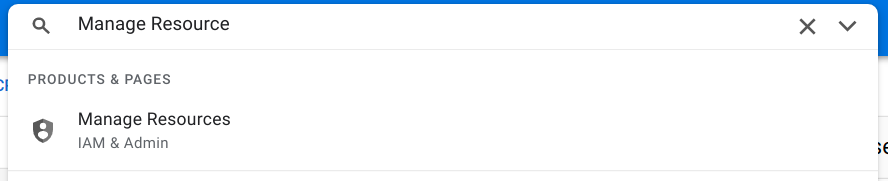

Select your project with a checkbox  and press . Follow the instructions to completely delete the project and any permissions associated with it.